<b>Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.transforms import Bbox

Font / Latex Settings

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.family": "sans-serif",
    "font.sans-serif": "Times New Roman",
})

plt.rc('text.latex', preamble=r'\usepackage{amsmath, bm, mathrsfs, mathtools, color}')

<b>Functions</b>

In [3]:
def pwl_function(
    x: np.ndarray,
    c: float,
    kappa: float,
    theta: float
):
    return kappa * (x + c) ** (-(1 + theta))

<b>Coordinates for points</b>

In [4]:
p_red = [0.35]
p_black = [0.05, 0.07, 0.1, 0.12, 0.17, 0.2, 0.21, 0.23, 0.27, 0.37, 0.4, 0.42, 0.47,
           0.5, 0.55, 0.6, 0.64, 0.7, 0.72, 0.75, 0.84, 0.87, 0.88]
p_other_one = [0.38, 0.41, 0.44, 0.51, 0.52, 0.54 ]
p_other_two = [0.61, 0.63, 0.68, 0.77]

b_top = 0.7
b_ttop = 0.85
b_bot = 0.05

<b>Data for kernel panel</b>

In [5]:
x = np.linspace(0.35, 50, 1000)
kappa = 1.0
c = 60
theta = 1.0
factor = 1750
x_pwl = np.linspace(0.35, 0.89, 1000)
y_pwl = pwl_function(x=x, c=c, kappa=kappa, theta=theta) * factor

delta_ = 0.58
x_delta_one_pwl = x_pwl[x_pwl <= delta_]
y_delta_one_pwl = y_pwl[0:len(x_delta_one_pwl)]

x_delta_two_pwl = x_pwl[x_pwl > delta_]
y_delta_two_pwl = y_pwl[len(x_delta_one_pwl):]

<b>Figure generation</b>

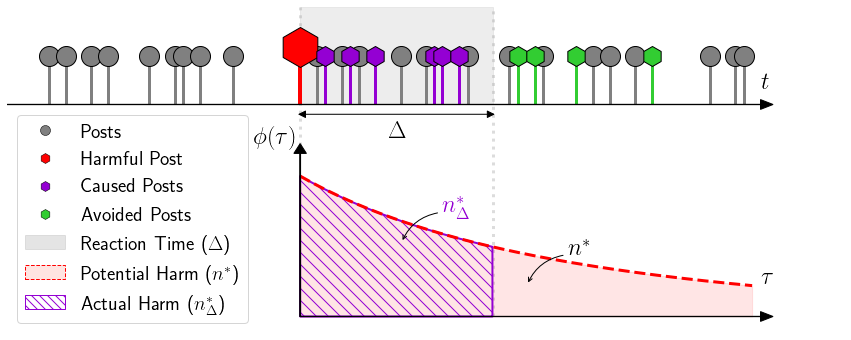

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))

c1 = 'r'
c2 = 'darkviolet'
c3 = 'limegreen'

"""
    Top panel
"""

# harm
ax.vlines(p_red, b_top, b_ttop,
          colors=c1, linewidth=4.0, 
          linestyles='solid', zorder=1)
y = np.repeat(b_ttop, len(p_red))
ax.scatter(p_red, y + 0.025, s=40 ** 2,
           marker="h", c=c1, edgecolors='k', zorder=2)
# normal
ax.vlines(p_black, b_top, b_ttop, 
          colors='gray', linewidth=3, 
          linestyles='solid', zorder=1)
y = np.repeat(b_ttop, len(p_black))
ax.scatter(p_black, y, s=20 ** 2, c='gray',edgecolors='k')
# other color - 1
ax.vlines(p_other_one, b_top, b_ttop, 
          colors=c2, linewidth=3, 
          linestyles='solid', zorder=1)
y = np.repeat(b_ttop, len(p_other_one))
ax.scatter(p_other_one, y, s=20 ** 2, marker="h",
           c=c2, edgecolors='k', zorder=2)
# other color - 2
ax.vlines(p_other_two, b_top, b_ttop, 
          colors=c3, linewidth=3, 
          linestyles='solid', zorder=1)
y = np.repeat(b_ttop, len(p_other_two))
ax.scatter(p_other_two, y, s=20 ** 2, marker="h",
           c=c3, edgecolors='k', zorder=2)
# arrow
ax.arrow(0, b_top, 0.9, 0.0, 
         head_width=0.03, head_length=0.015, fc='k', ec='k', zorder=4)

# gray delta area
ax.vlines(delta_, b_bot, 1.0, 
          colors='gainsboro', linewidth=3, 
          linestyles='dotted', zorder=0)
ax.vlines(p_red[0], 0.575, 1.0, 
          colors='gainsboro', linewidth=3, 
          linestyles='dotted', zorder=0)
ax.fill_between((p_red[0], delta_), b_top, 1.0, color='darkgrey', 
                alpha=.2, label=r'Reaction Time ($\Delta$)', zorder=0)

"""
    Bottom panel
"""

ax.plot(x_pwl, y_pwl, c=c1, linewidth=3.0, linestyle='dashed', zorder=2)

ax.fill_between(x_pwl, b_bot, y_pwl, color=c1, alpha=.1, 
                label='Caused Harm', zorder=0)
ax.fill_between(x_delta_one_pwl, b_bot, y_delta_one_pwl, linewidth=2.0,
                color='None', alpha=1.0, edgecolor=c2, hatch='\\\\', zorder=1)


ax.arrow(p_red[0], b_bot, 0.55, 0.0, 
         head_width=0.03, head_length=0.015, fc='k', ec='k', zorder=4)
ax.arrow(p_red[0], b_bot, 0.0, 0.5, 
         head_width=0.015, head_length=0.03, fc='k', ec='k', zorder=4)

style=dict(color='k')
p1 = patches.FancyArrowPatch((p_red[0] - 0.005, 0.67), (delta_ + 0.005, 0.67), 
                             arrowstyle='<|-|>', mutation_scale=16, **style)
ax.add_patch(p1)
style = dict(size=24, color='k')
ax.text(p_red[0] + 0.105, 0.6, r"$\Delta$", **style, zorder=4)
ax.text(0.295, 0.58, r"$\phi(\tau)$", **style, zorder=4)
ax.text(0.9, 0.15, r"$\tau$", **style, zorder=4)
ax.text(0.9, 0.75, r"$t$", **style, zorder=4)
stylec2 = dict(size=24, color=c2)
ax.text(0.52, 0.37, r"$n^{*}_{\Delta}$", **stylec2, zorder=4)
ax.annotate("",
            xy=(0.47, 0.27), xycoords='data',
            xytext=(0.52, 0.37), textcoords='data',
            arrowprops=dict(arrowstyle="->", color="k",
                            shrinkA=5, shrinkB=5,
                            patchA=None, patchB=None,
                            connectionstyle="arc3,rad=0.3",
                           )
            ,)
ax.text(0.67, 0.24, r"$n^{*}$", **style, zorder=4)
ax.annotate("",
            xy=(0.62, 0.14), xycoords='data',
            xytext=(0.67, 0.24), textcoords='data',
            arrowprops=dict(arrowstyle="->", color="k",
                            shrinkA=5, shrinkB=5,
                            patchA=None, patchB=None,
                            connectionstyle="arc3,rad=0.3",
                           )
            ,)

# ax.text(0.55, 0.5, r'Harm reduction: $\chi=\frac{4}{10}=40\%$', **dict(size=24), zorder=4)

"""
    Custom legend
"""
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='Posts',
                          markerfacecolor='gray', 
                          markersize=10),
                   Line2D([0], [0], marker='h', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='Harmful Post',
                          markerfacecolor=c1,
                          markersize=10),
                   Line2D([0], [0], marker='h', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='Caused Posts',
                          markerfacecolor=c2,
                          markersize=10),
                   Line2D([0], [0], marker='h', color='w', 
                          markeredgecolor='k',
                          markeredgewidth=0.5,
                          label='Avoided Posts',
                          markerfacecolor=c3,
                          markersize=10),
                   mpatches.Patch(facecolor='gray', alpha=0.2,
                                  edgecolor='gray',
                                  label=r'Reaction Time ($\Delta$)'),
                   mpatches.Patch(facecolor='mistyrose',
                                  edgecolor=c1,
                                  linestyle='dashed',
                                  label=r'Potential Harm ($n^{*}$)'),
                   mpatches.Patch(facecolor='w',
                                  edgecolor=c2,
                                  hatch='\\\\\\',
                                  label=r'Actual Harm ($n^{*}_{\Delta}$)')]

ax.legend(handles=legend_elements, loc="lower left", fontsize=20)
plt.xlim(0, 1)
plt.ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')
bbox = Bbox([[0,0],[0.92, 1]])
bbox = bbox.transformed(ax.transData).transformed(fig.dpi_scale_trans.inverted())
plt.savefig('../plots/delete-plot.pdf', facecolor='white', bbox_inches=bbox, 
            edgecolor='white')
plt.show();